In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("/home/inventor/Datasets/California House Price/Cal_house/housing.csv")

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# fill the missing values 

df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [7]:
df.duplicated().sum()

np.int64(0)

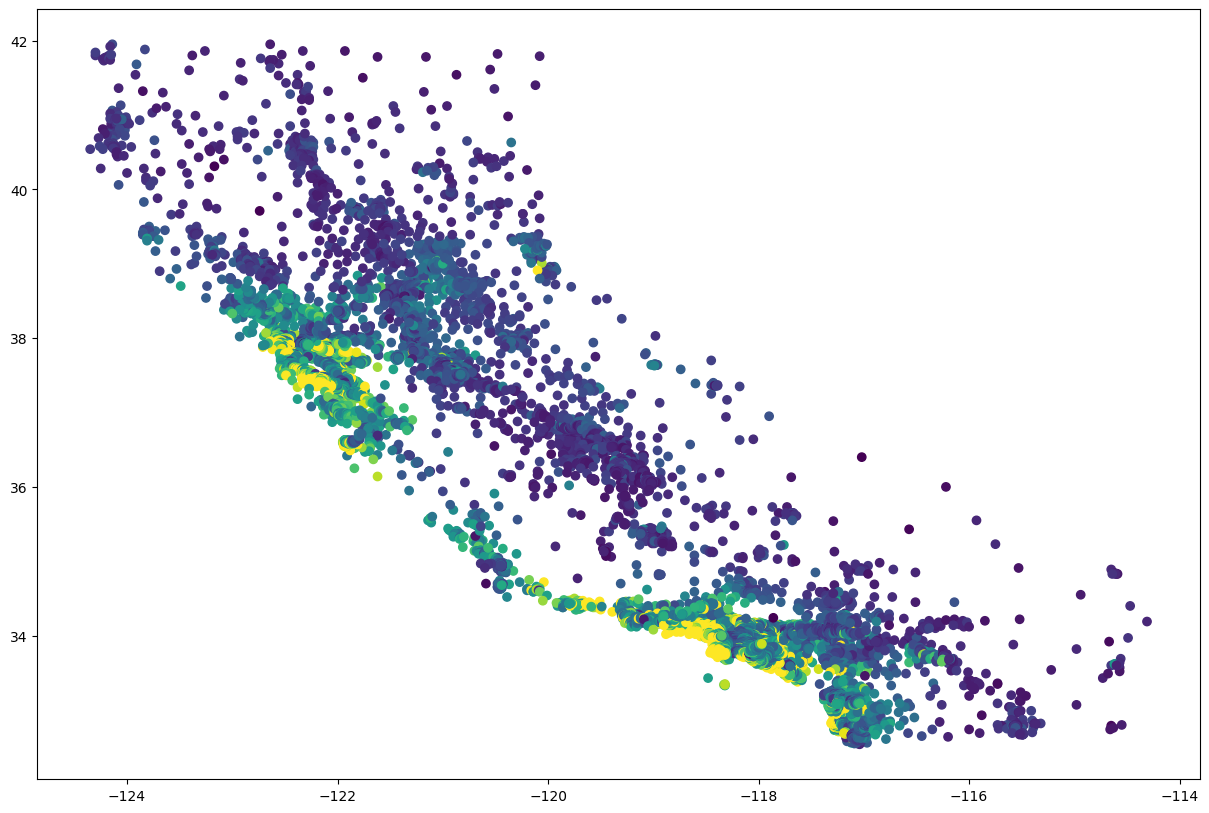

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(df["longitude"], df["latitude"], c=df["median_house_value"])
plt.show()

In [9]:
# Change the datatypes
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df["housing_median_age"] = df["housing_median_age"].astype("int64")
df["total_rooms"] = df["total_rooms"].astype("int64")
df["total_bedrooms"] = df["total_bedrooms"].astype("int64")
df["population"] = df["population"].astype("int64")
df["households"] = df["households"].astype("int64")
df["median_house_value"] = df["median_house_value"].astype("int64")

In [11]:
num_cols = [feature for feature in df.columns if df[feature].dtype in ["float64", "int64"]]
cat_cols = [col for col in df.columns if df[col].dtype not in ["float64", "int64"]]

In [12]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390839,-0.512592,-0.443449,-1.216128,-1.115804
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925118,-0.944405,-1.008420,-0.691593,-1.124470
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126085,-0.369537,-0.174042,-1.142593,-0.992746
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307358,-0.604429,-0.393753,-1.054583,-1.058608


In [13]:
# Encode Categorical Columns 
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first", dtype=np.int64)

encoder = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoder, columns=one_hot.get_feature_names_out(cat_cols), dtype=np.int64)

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY,0,0,1,0


In [14]:
encoded_df = encoded_df.drop("ocean_proximity", axis=1)

In [15]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("median_house_value", axis=1), encoded_df["median_house_value"], test_size=0.2, random_state=42)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_sk = lr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)
r2_score_sk

0.6257361394054031

In [19]:
class Minibatch_Gradient_Descent():

    def __init__(self, batch_size, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0,1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):
            for j in range(int(X_train.shape[0] / self.batch_size)):

                idx = np.random.choice(X_train.shape[0], self.batch_size, replace=False)

                y_hat = np.dot(X_train[idx], self.coef_)  

                error = y_train[idx] - y_hat

                coef_slope = -2 * np.dot(error, X_train[idx]) / self.batch_size
                self.coef_ = self.coef_ + (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0,1,axis=1)
        y_pred = np.dot(X_test, self.coef_)
        return y_pred

In [20]:
mgd = Minibatch_Gradient_Descent(learning_rate=0.000001, epochs=100, batch_size=64)

In [21]:
mgd.fit(X_train, y_train)

Coef_: [-0.00291149  0.00376837  0.01139596  0.00360105 -0.02630067 -0.00303748
  0.00147807 -0.01867695 -0.05786022  0.00043935 -0.00446988 -0.00441826
 -0.00867483]


In [22]:
y_pred = mgd.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

-0.10001983883262056

In [24]:
def r2_score_custom(y_true, y_pred):

    mean_value = np.mean(y_true)

    SSE = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - mean_value) ** 2)

    r2_score = 1 - (SSE / TSS)
    return r2_score
    

In [25]:
class MiniBatch_Gradient_Descent_2():

    def __init__(self, batch_size,learning_rate, epochs):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size 

    def fit(self, X_train, y_train):
        
        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01
        self.intercept_ = 0

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0] / self.batch_size)):

                idx = np.random.choice(X_train.shape[0], self.batch_size, replace=False)

                y_hat = self.intercept_ + np.dot(X_train[idx], self.coef_)

                error = y_train[idx] - y_hat

                intercept_slope = -2 * (error) / self.batch_size
                self.intercept_ = self.intercept_ + (self.lr * intercept_slope)

                coef_slope = -2 * np.dot(error, X_train[idx]) / self.batch_size
                self.coef_ = self.coef_ + (self.lr * coef_slope)
        
        print(f"Intercept_: {self.intercept_}, Coef_: {self.coef_}")

    
    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred
                

In [26]:
mgd_2 = MiniBatch_Gradient_Descent_2(batch_size=64, learning_rate=0.000001, epochs=100)

In [27]:
mgd_2.fit(X_train, y_train)

Intercept_: [ 2.32237341e-06  5.87333296e-06  2.22132763e-06 -7.47388672e-06
  7.21608086e-06 -7.14972114e-06  2.17185369e-06 -1.47718672e-06
  3.97042512e-06  3.86660972e-07 -7.68269126e-06  1.74818933e-07
 -1.25893444e-06  3.87760288e-07 -5.81659835e-06 -3.24519694e-06
  3.52434189e-06 -5.99676288e-06 -1.42551535e-06  1.35777551e-06
  1.05386265e-05 -2.70968914e-06  7.41317352e-06  6.79280814e-06
 -6.21214671e-06  9.33923293e-06 -1.32203639e-06  5.67976664e-06
 -3.89334650e-06 -1.21844153e-06  3.60812266e-06 -2.73516641e-06
  4.59631626e-06  5.20583657e-06 -3.33853469e-06  4.69326410e-06
  5.48201707e-07 -8.74853856e-07 -4.75873592e-06  5.36028677e-06
  5.72438222e-06  4.20466173e-06  1.95137534e-06 -2.16497312e-06
 -8.06279888e-06 -1.44729884e-06 -2.64304813e-06 -5.96470707e-06
  4.32681995e-07  5.36241686e-07  2.93808200e-06  4.79705592e-06
  6.74346645e-06 -3.56981207e-06  3.76133194e-06 -8.21529925e-06
  3.73123463e-07  8.80866357e-06 -2.15836895e-06 -3.14604843e-07
  8.93925184e

In [28]:
y_pred_2 = mgd.predict(X_test)

In [29]:
r2_score(y_test, y_pred_2)

-0.10001983883262056